## Iris classification using decision trees

## Step 2: Import the required Python packages (as we are using Python here)


In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step 1: Gather the data / dataset

In [18]:
#loading dataset
df = pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Step 3: Build a data frame

In [19]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [20]:
df.shape

(150, 6)

In [5]:
#Encoding the categorical variables
species_dummies = pd.get_dummies(df.Species)

In [6]:
species_dummies

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [7]:
#Concatenating the encoded columns
df = pd.concat([df,species_dummies], axis='columns')

In [8]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1,0,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1,0,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1,0,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1,0,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1,0,0


In [9]:
#dropping unnecessary features
df.drop(['Species','Id'],axis='columns',inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


## Step 4: Create the Model in Python (In this example Decision Tree)

In [10]:
#Extracting Independent and dependent variables
x=df.iloc[:,0:4].values
y=df.iloc[:,4:7].values

In [11]:
#Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

## Step 5: Predict using Test Dataset and Check the score

In [12]:
#fitting desicion tree classifier to the training set
from sklearn.tree import DecisionTreeClassifier
Classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
Classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [13]:
#prediciting the test set result
y_pred=Classifier.predict(x_test)

In [14]:
Classifier.predict([[4.6,3.1,1.5,8.2]])

array([[0, 0, 1]], dtype=uint8)

In [15]:
#finding the accuracy
Classifier.score(x_test,y_test)

1.0

## Visualisation

[Text(418.5, 498.3, 'X[3] <= 0.8\nentropy = 0.916\nsamples = 120\nvalue = [[81, 39]\n[83, 37]\n[76, 44]]'),
 Text(354.11538461538464, 407.70000000000005, 'entropy = 0.0\nsamples = 39\nvalue = [[0, 39]\n[39, 0]\n[39, 0]]'),
 Text(482.8846153846154, 407.70000000000005, 'X[3] <= 1.75\nentropy = 0.663\nsamples = 81\nvalue = [[81, 0]\n[44, 37]\n[37, 44]]'),
 Text(257.53846153846155, 317.1, 'X[2] <= 4.95\nentropy = 0.313\nsamples = 40\nvalue = [[40, 0]\n[4, 36]\n[36, 4]]'),
 Text(128.76923076923077, 226.5, 'X[3] <= 1.65\nentropy = 0.125\nsamples = 35\nvalue = [[35, 0]\n[1, 34]\n[34, 1]]'),
 Text(64.38461538461539, 135.89999999999998, 'entropy = 0.0\nsamples = 34\nvalue = [[34, 0]\n[0, 34]\n[34, 0]]'),
 Text(193.15384615384616, 135.89999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [[1, 0]\n[1, 0]\n[0, 1]]'),
 Text(386.3076923076923, 226.5, 'X[3] <= 1.55\nentropy = 0.647\nsamples = 5\nvalue = [[5, 0]\n[3, 2]\n[2, 3]]'),
 Text(321.9230769230769, 135.89999999999998, 'entropy = 0.0\nsamples = 

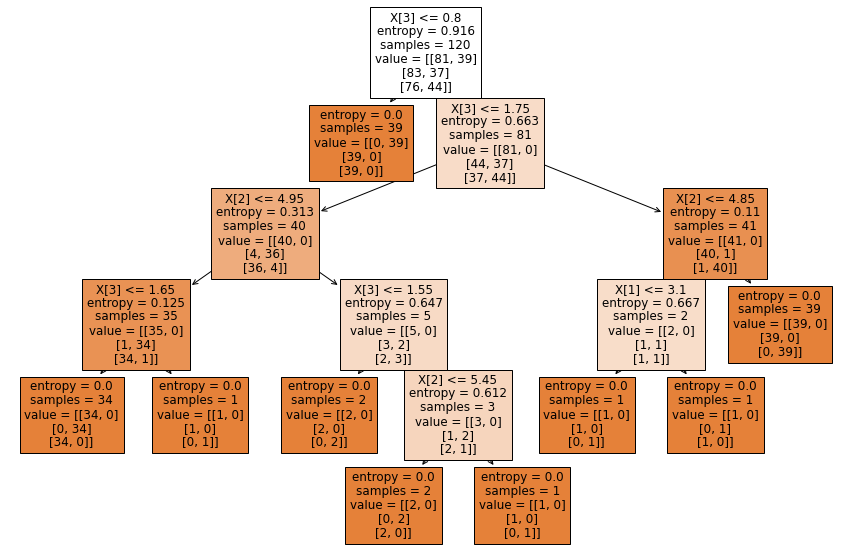

In [16]:
#Plotting tree with plot_tree
from sklearn import tree
fig = plt.figure(figsize=(15,10))
tree.plot_tree(Classifier,filled=True)